# Chapter 3: Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## MNIST Dataset

In [2]:
# from sklearn.datasets import fetch_openml

# mnist = fetch_openml('mnist_784', as_frame=False)


In [3]:
# create folder if it doesnot exist
# os.makedirs('dataset',exist_ok=True)
# X = mnist.data
# y = mnist.target
# np.savez_compressed('dataset/mnist.npz',X=X, y=y)

In [4]:
mnist = np.load('dataset/mnist.npz', allow_pickle=True)

In [5]:
X = mnist['X']
y = mnist['y']

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [9]:
y

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

Function to Plot Image

In [10]:
def plot_image(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

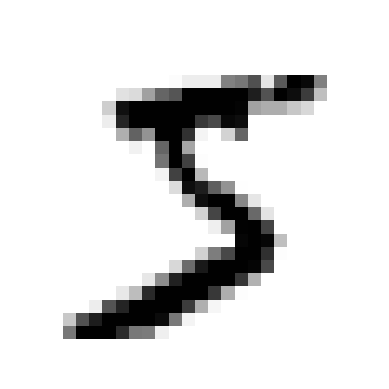

In [11]:
plot_image(X[0])
plt.show()

In [12]:
y[0]

'5'

In [13]:
type(y[0])

str

In [14]:
type(X[0])

numpy.ndarray

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

In [16]:
X_train.shape

(60000, 784)

In [17]:
X_test.shape

(10000, 784)

In [18]:
y_train.shape

(60000,)

In [19]:
y_test.shape

(10000,)

## Training a Binary Classifier

In [20]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [21]:
y_train_5

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [22]:
y_test_5

array([False, False, False, ..., False,  True, False], shape=(10000,))

In [23]:
from sklearn.linear_model import  SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [24]:
some_digit = np.array([1] + [0]*783).reshape(1, -1)
sgd_clf.predict(some_digit)

array([ True])

## Performance Measures

In [25]:
from sklearn.model_selection import cross_val_score

cross_val_score(
    sgd_clf, X_train, y_train_5,
     cv=3,scoring='accuracy'
)

array([0.95035, 0.96035, 0.9604 ])

In [26]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [27]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

## Confusion Matrices

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(
    sgd_clf,X_train,y_train_5,cv=3
)

In [29]:
y_train_pred

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [30]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_train_5, y_train_pred)

In [31]:
cm

array([[53892,   687],
       [ 1891,  3530]])

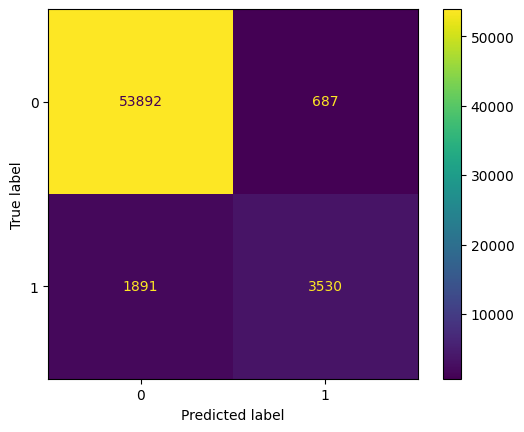

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [33]:
confusion_matrix(y_train_5,y_train_5)

array([[54579,     0],
       [    0,  5421]])

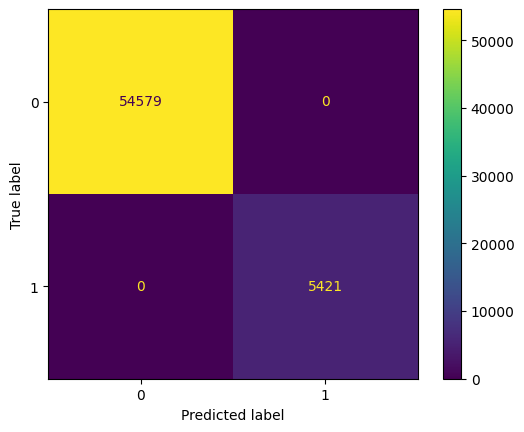

In [34]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_train_5,y_train_5)
).plot()
plt.show()

In [40]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_train_pred)
print(f"Precision = {precision * 100:.2f}%")

Precision = 83.71%


In [38]:
recall = recall_score(y_train_5, y_train_pred)
print(f"Recall = {recall * 100:.2f}%")

Recall = 65.12%


In [39]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train_5, y_train_pred)
print(f"F1 Score = {f1 * 100:.2f}%")

F1 Score = 73.25%


In [41]:
y_scores = cross_val_predict(
    sgd_clf, X_train, y_train_5, cv=3,
    method='decision_function'
)

In [43]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))